In [1]:
#import data from sklearn.datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_breast_cancer()
class_names = dataset.target_names
#split to training & testing
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size = 0.33, random_state=42)

In [2]:
print(class_names)

['malignant' 'benign']


In [4]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


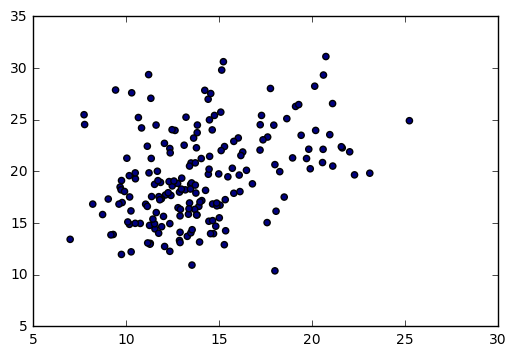

0.0
0


In [44]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
clustering = DBSCAN(eps=3, min_samples=2).fit(X_train)
# clustering.labels_
y_pred = DBSCAN().fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))

0.8670212765957447
163


# 從這裡開始才是要的！

In [52]:
#import data from sklearn.datasets
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset['data'])

(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
(569, 30) (569,)
K= 2 , Silhouette = 0.4018381039546789
K= 3 , Silhouette = 0.4018381039546789
K= 4 , Silhouette = 0.4018381039546789
K= 5 , Silhouette = 0.4018381039546789
K= 6 , Silhouette = 0.4018381039546789
K= 7 , Silhouette = 0.4018381039546789
K= 8 , Silhouette = 0.4018381039546789
K= 9 , Silhouette = 0.4018381039546789
K= 10 , Silhouette = 0.4018381039546789


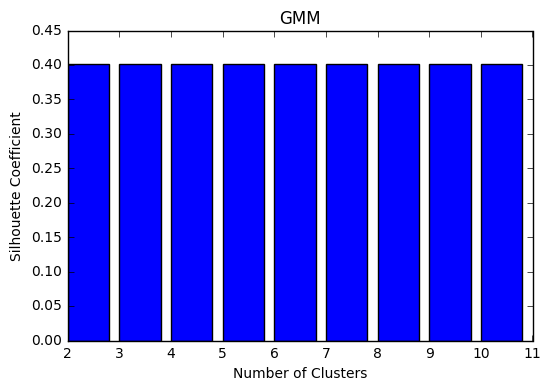

In [53]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
#以 Silhouette Coefficient 選擇兩點距離k
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    clustering = DBSCAN(eps=k, min_samples=10).fit(X)
    y_pred = DBSCAN().fit_predict(X)
    print(X.shape,labels.shape)
    silhouette_avg = metrics.silhouette_score(X, labels)
    silhouette_avgs.append(silhouette_avg)

#作圖並印出 K = 2~10 的 Silhouette Coefficient
for k in ks:
    print('K=', k, ', Silhouette =', silhouette_avgs[k-2])

plt.bar(ks, silhouette_avgs)
plt.ylabel('Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.title('GMM')
plt.show()

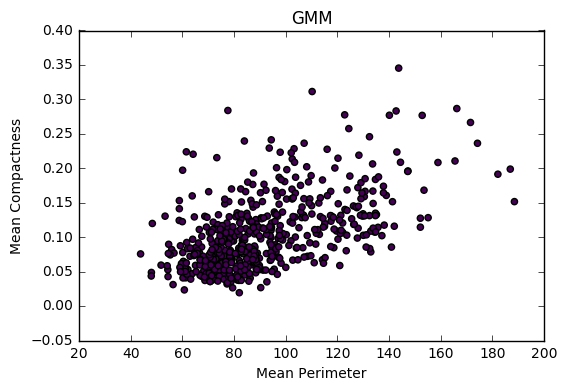

In [54]:
#選擇 k=2
clustering = DBSCAN(eps=2, min_samples=10).fit(X)
y_pred = DBSCAN().fit_predict(X)
#投影至其中兩個維度
plt.scatter(X.values[:,2], X.values[:,5], c=y_pred, cmap='viridis')
plt.ylabel('Mean Compactness')
plt.xlabel('Mean Perimeter')
plt.title('GMM')
plt.show()

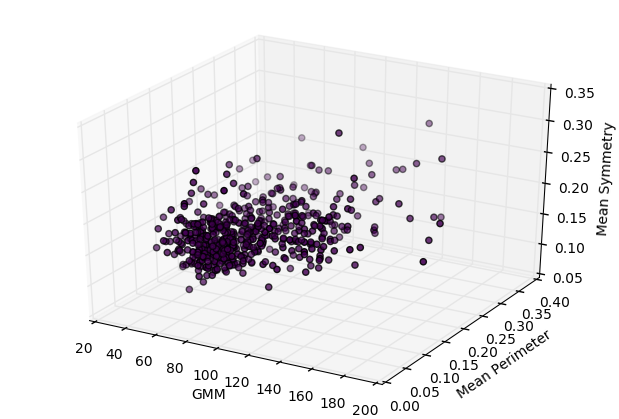

In [55]:
#投影至其中三個維度
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X.values[:,2], X.values[:,5], X.values[:,8], c=y_pred, cmap='viridis')
ax.set_xlabel('Mean Compactness')
ax.set_ylabel('Mean Perimeter')
ax.set_zlabel('Mean Symmetry')
ax.set_xlabel('GMM')
pyplot.show()

In [42]:
#description of each cluster
for i in range(0,2):
    print('### Clustering',i+1,'###\n',X[labels == i].describe(),'\n')

### Clustering 1 ###
               0           1           2           3           4           5   \
count  363.00000  363.000000  363.000000  363.000000  363.000000  363.000000   
mean    12.16278   18.102011   78.173140  464.165014    0.092664    0.079459   
std      1.76760    4.055606   11.723955  133.091553    0.013434    0.032949   
min      6.98100    9.710000   43.790000  143.500000    0.052630    0.019380   
25%     11.10500   15.225000   70.935000  378.300000    0.083165    0.055270   
50%     12.21000   17.530000   78.270000  458.700000    0.091360    0.075250   
75%     13.46000   19.990000   86.290000  557.650000    0.100700    0.097565   
max     17.42000   33.810000  114.500000  948.000000    0.163400    0.223900   

               6           7           8           9   ...          20  \
count  363.000000  363.000000  363.000000  363.000000  ...  363.000000   
mean     0.046537    0.026123    0.174147    0.062708  ...   13.404157   
std      0.043736    0.016274    0.